In this notebook, you will find graphs representing results from simulations previously run, so you can compare your results with these

In [7]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
from leap.simulation import Simulation
from leap.logger import get_logger

In [4]:
# setup the logger
logger = get_logger(__name__)

In [ ]:
# set output path to output/jupter folder in root
output_path = pathlib.Path("/home/me/pharmsci/leap/output/jupyter")
simulation = Simulation(min_year=2001, province="CA", population_growth_type="M3")
repr(simulation)

"Simulation(max_age=111, province='CA', min_year=2001, time_horizon=19, num_births_initial=100, population_growth_type='M3')"

In [6]:
# check if path exists before running
if not output_path.exists():
    raise Exception(f"Please input a correct output path.\nPath was <{output_path}>")

logger.message("Running simulation...")
outcome_matrix = simulation.run()
logger.message(outcome_matrix)
outcome_matrix.save(path=output_path)

### Figure 6. Rate of antibiotic prescriptions by sex (red: females; blue: males) for simulated (solid) and target values (dotted), with the floor rate of 50 per 1,000 (purple).

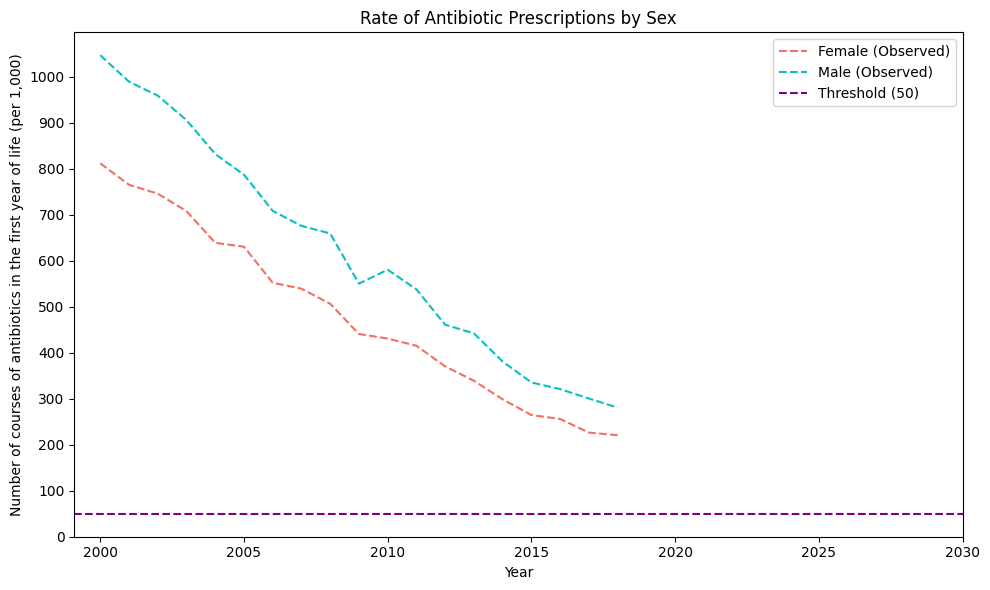

In [37]:
## Figure 6. Rate of antibiotic prescriptions by sex (red: females; blue: males) for simulated (solid) and target values (dotted), with the floor rate of 50 per 1,000 (purple).

# Load target data
infant_data = pd.read_csv("leap/processed_data/InfantAbxBC.csv")

# Plotting
plt.figure(figsize=(10, 6))

# Define colors to plot for different sexs
sex_colour_dict = {"Male": "#09bfc4", "Female": "#f86d63"}

# Dotted lines from count_data
for sex in infant_data['sex'].unique():
    infant_sex_data = infant_data[infant_data['sex'] == sex]
    plt.plot(
        infant_sex_data['year'],
        infant_sex_data['rate'],
        c=sex_colour_dict[sex],
        linestyle='dashed',
        label=f"{sex} (Observed)"
    )

# Additional elements
plt.axhline(y=50, color='purple', linestyle='dashed', label="Threshold (50)")
plt.ylabel("Number of courses of antibiotics in the first year of life (per 1,000)")
plt.xlabel("Year")
plt.xticks(range(infant_data['year'].min(), infant_data['year'].max() + 16, 5))
plt.yticks(range(0, 1100, 100))
plt.legend(title="")
plt.title("Rate of Antibiotic Prescriptions by Sex")

# Save the figure
plt.tight_layout()
plt.show()